In [1]:
import itertools
from pathlib import Path
from typing import List, Dict, Any

import isthmuslib

## Load the data

In [2]:
data_path = Path.cwd() / "output" / "rs16_era_1679780030.csv"
if not data_path.exists():
    raise FileNotFoundError(f"File {data_path} not found")
v: isthmuslib.VectorMultiset = isthmuslib.VectorMultiset().read_csv(data_path, inplace=False)

## Light feature eng

In [3]:
v.data['len_extra'] = v.data['extra'].apply(len)
v.data['ratio_len_extra_num_outputs'] = v.data['len_extra'] / v.data['num_outputs']

In [4]:
v.head().transpose()

,0,1,2,3,4
tx_hash,e6ee99891a8380730a0e2f9f5befa61736968f8fff8966...,6469cbb6dc6e04bfc9fe181a21250b4bc52e518d7e4f54...,73d13d799e47c0ede39e34d513bdfca583fbae7e62b4d3...,57a6497d3b3a1d4f69ea8c31898e1390ab0bd4a47922f2...,acecb9fd0e666c480e0d0c5221fd7b840cb1b33afe83f3...
block_height,2688888,2688888,2688888,2688888,2688888
block_timestamp,1660416458,1660416458,1660416458,1660416458,1660416458
version,2,2,2,2,2
unlock_time,0,0,0,0,0
num_inputs,1,1,2,1,1
num_outputs,2,2,2,2,2
extra,"[1, 130, 171, 236, 79, 222, 123, 211, 149, 169...","[1, 53, 72, 66, 223, 51, 96, 88, 235, 200, 167...","[1, 101, 67, 95, 61, 45, 98, 194, 14, 170, 142...","[1, 16, 44, 199, 24, 6, 38, 217, 19, 109, 164,...","[1, 86, 0, 203, 44, 211, 108, 168, 89, 30, 102..."
txn_fee_atomic,5816000000.0,145300000.0,39380000.0,29080000.0,29120000.0
rct_type,5.0,5.0,5.0,5.0,5.0


## Viz

In [5]:
keys: List[str] = [
    'version',
    'unlock_time',
    'num_inputs',
    'num_outputs',
    'txn_fee_atomic',
    'rct_type',
    'len_extra',
    'ratio_len_extra_num_outputs',
]

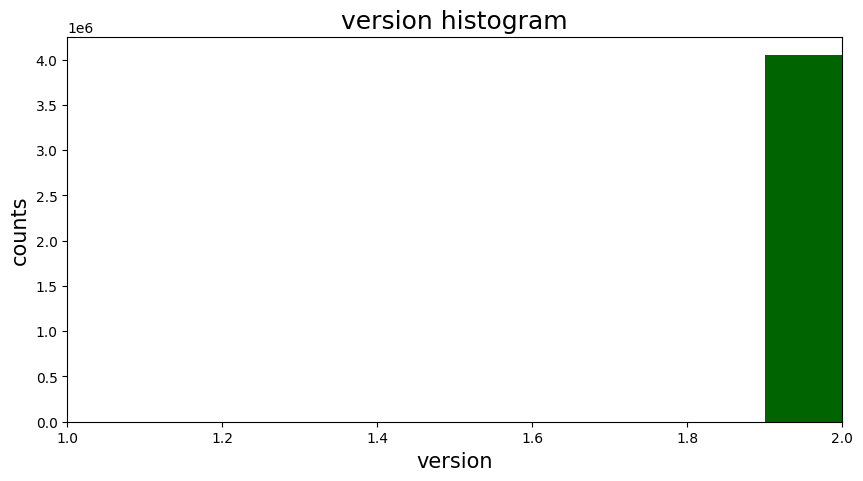

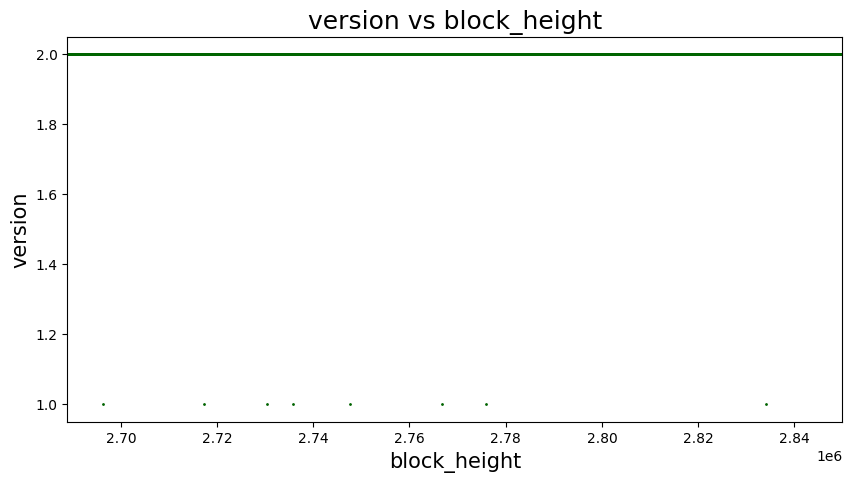

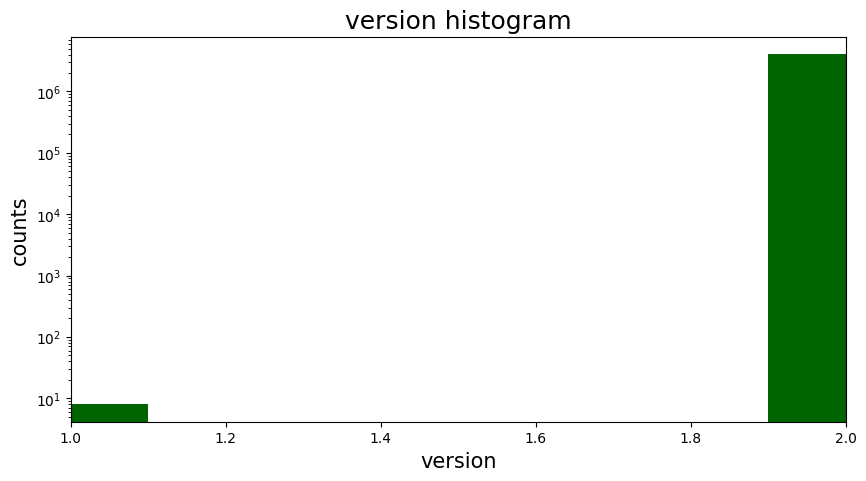

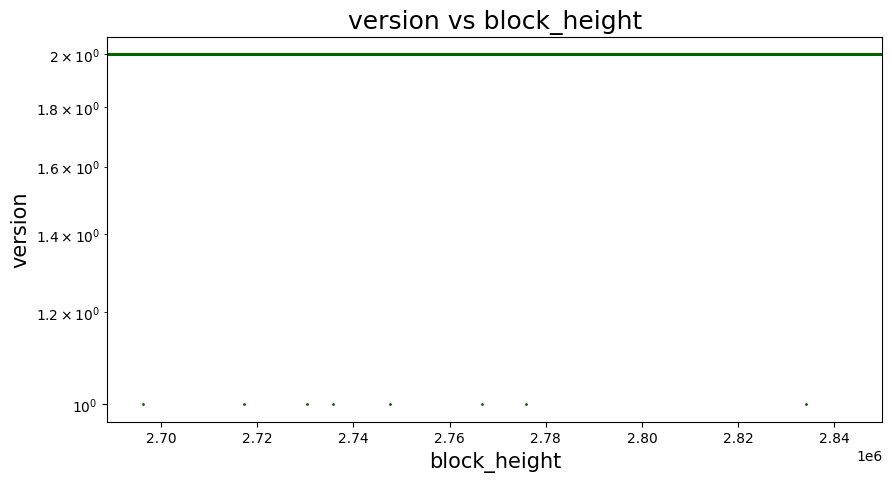

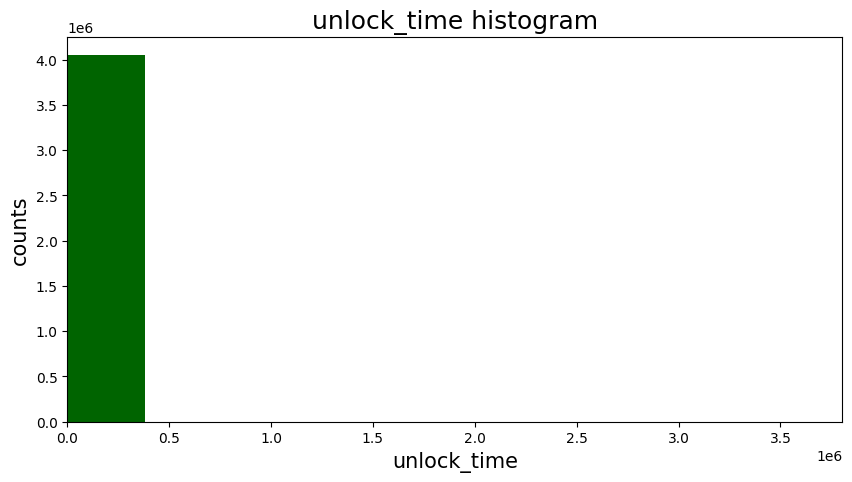

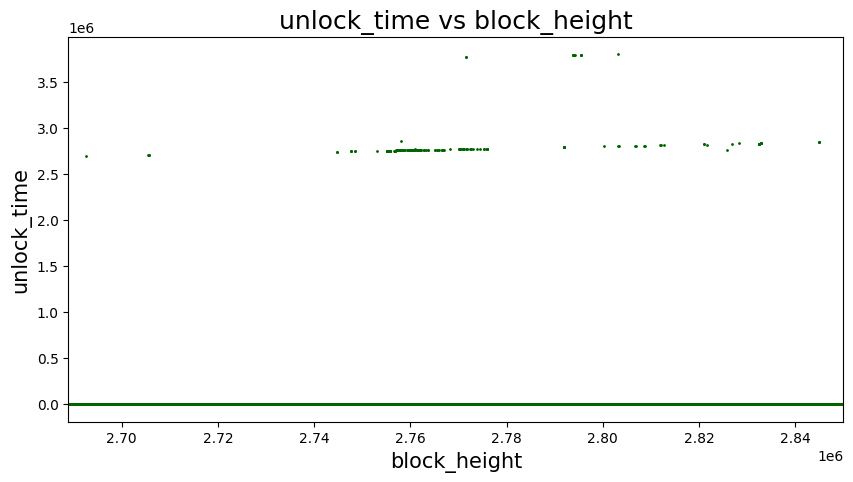

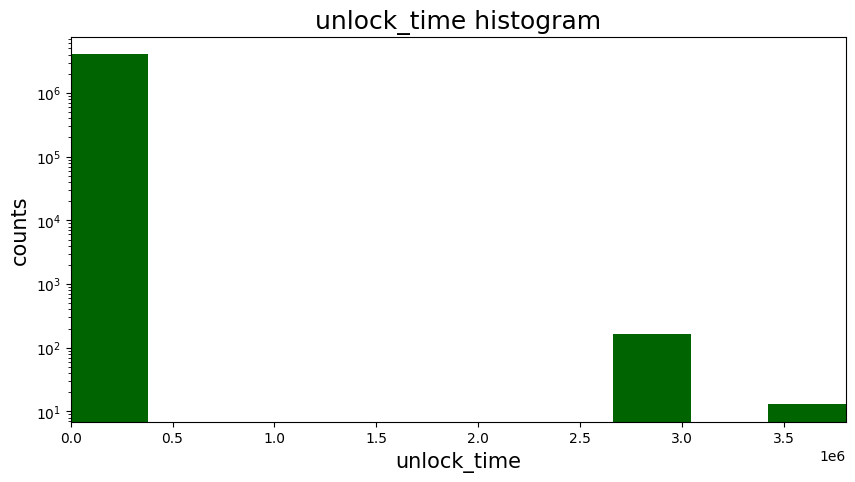

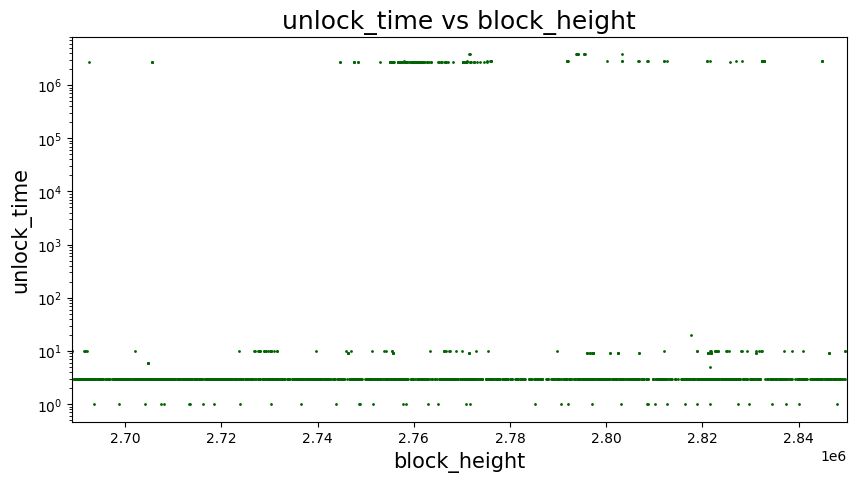

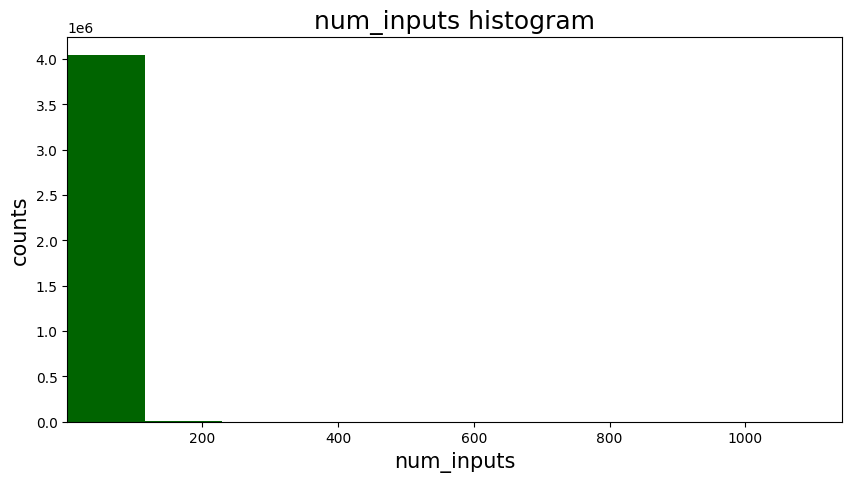

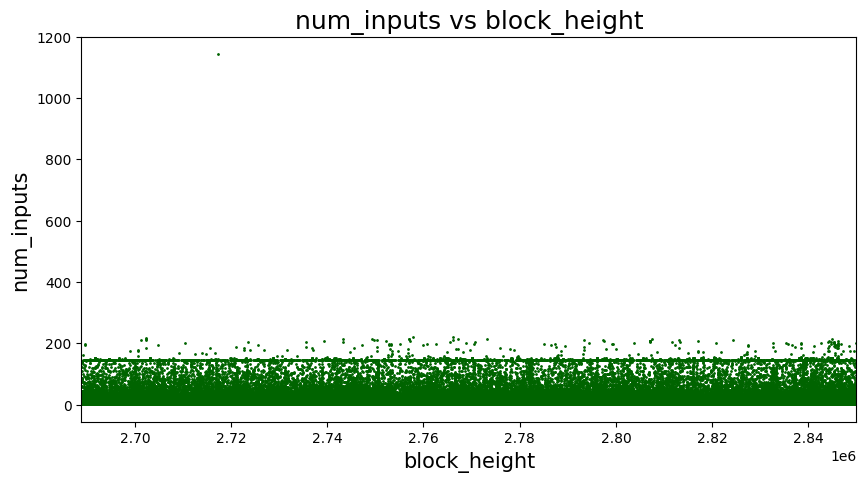

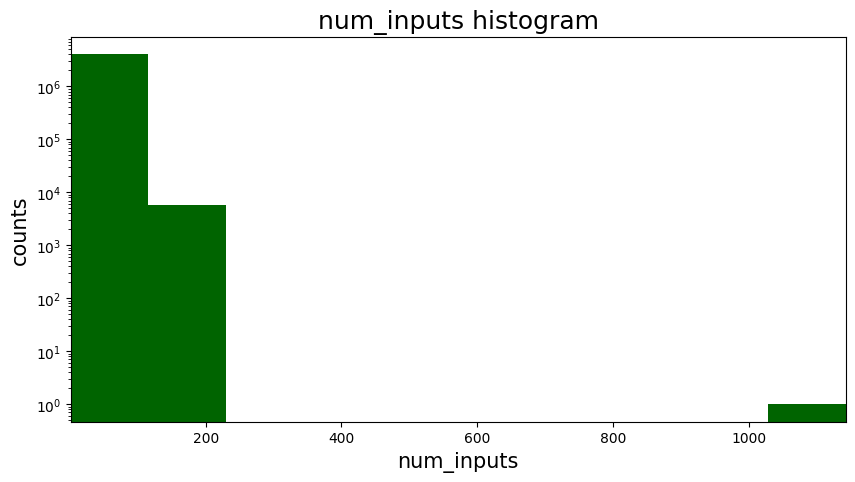

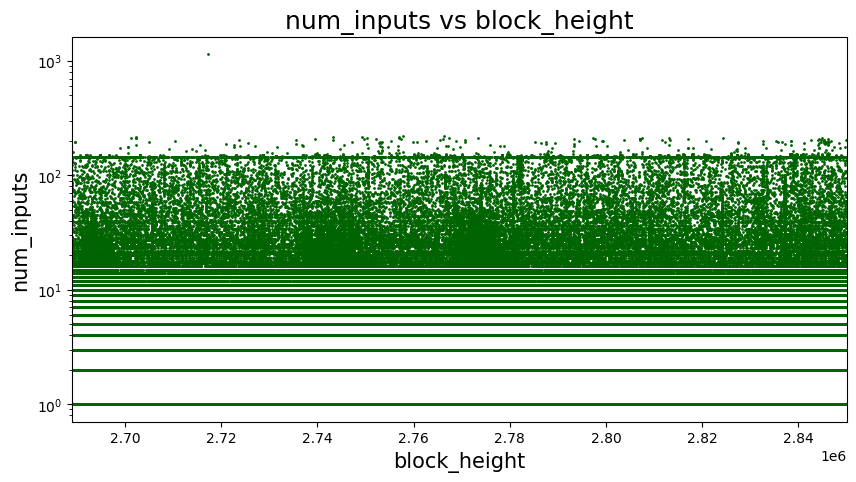

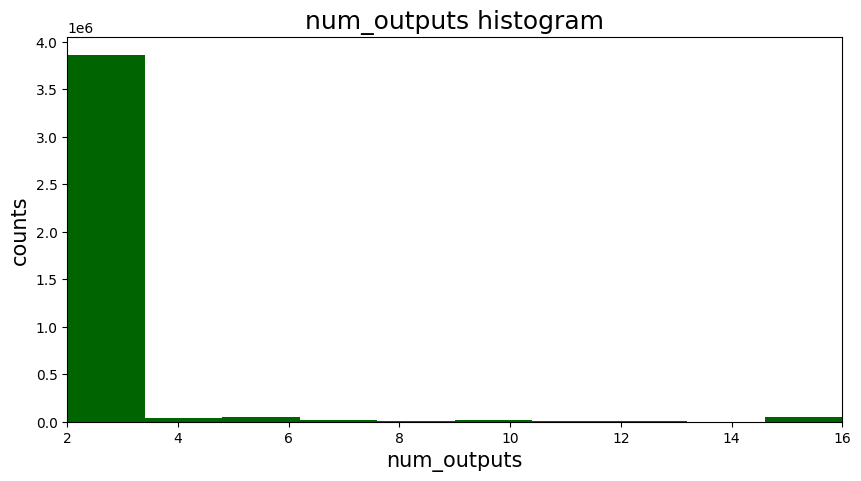

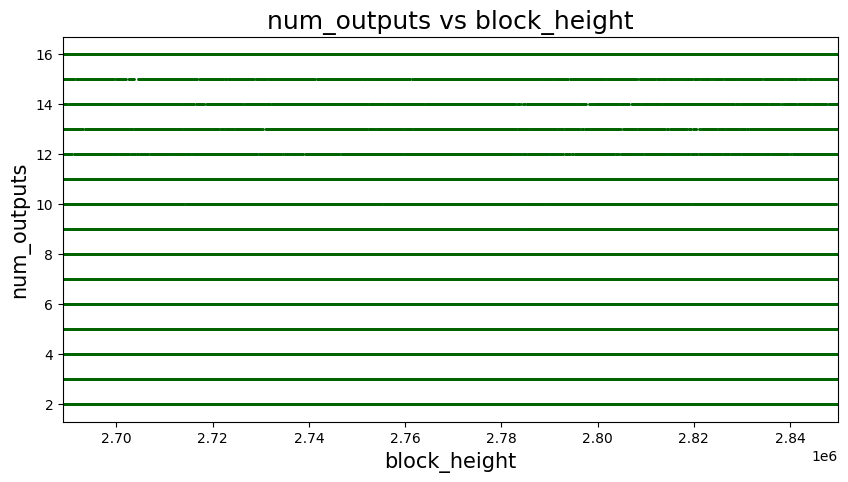

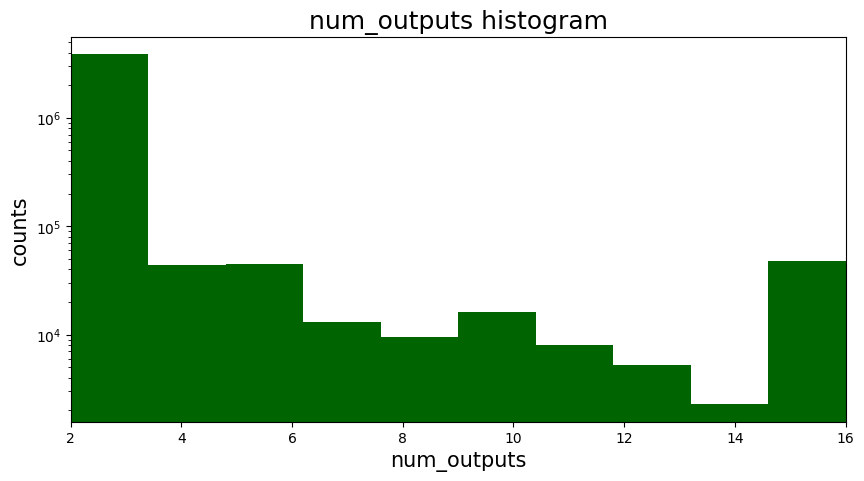

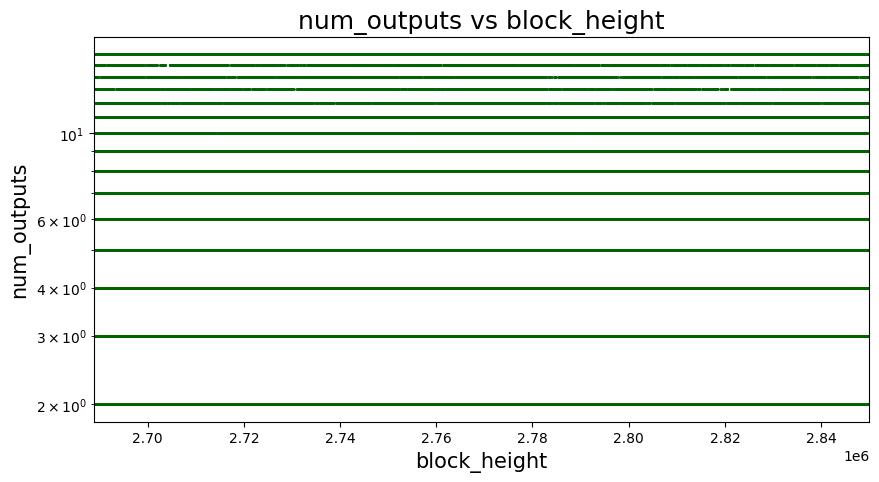

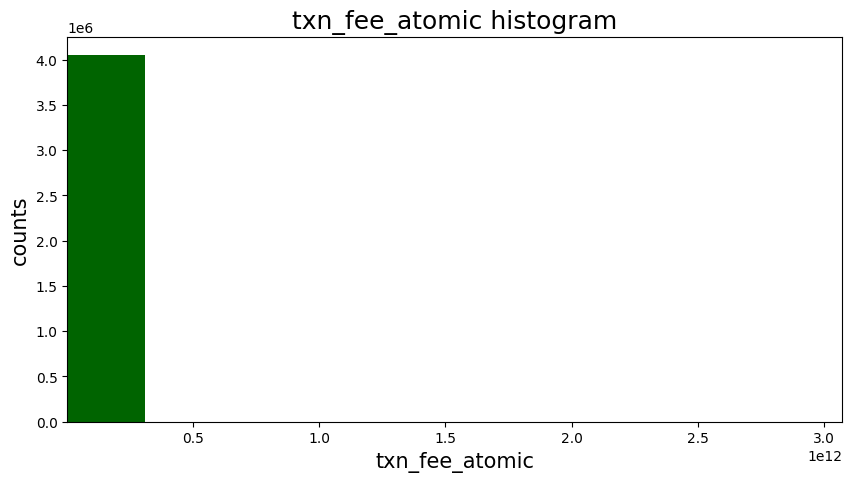

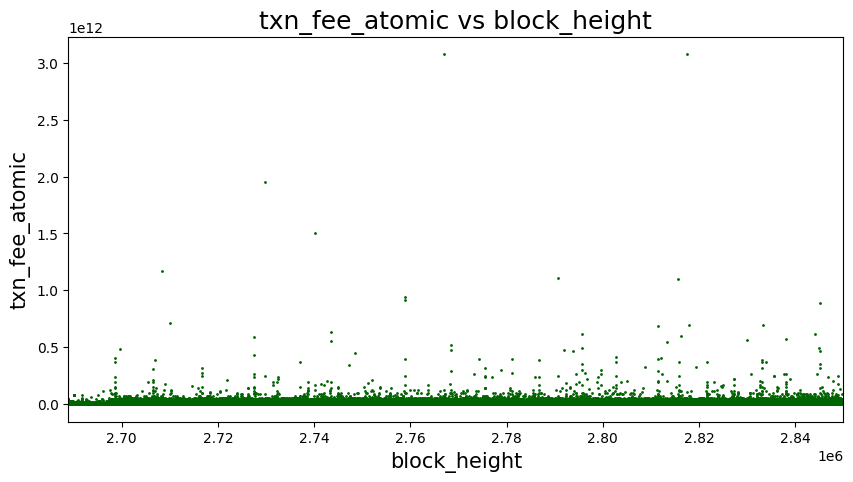

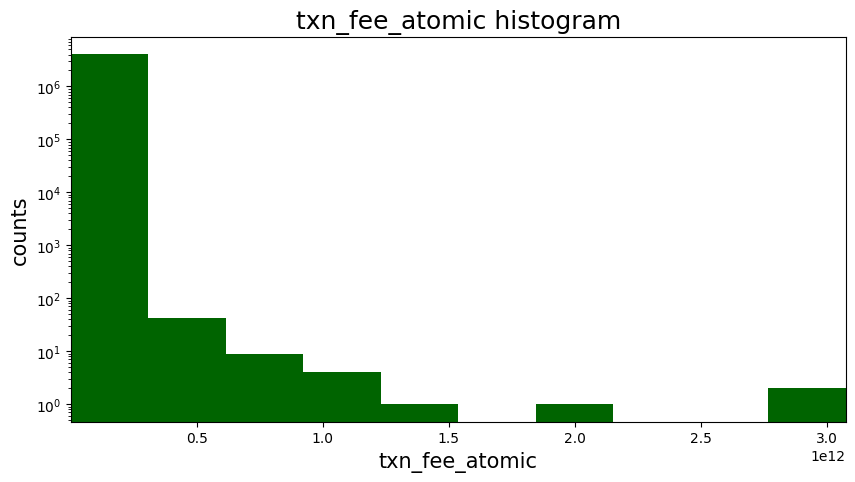

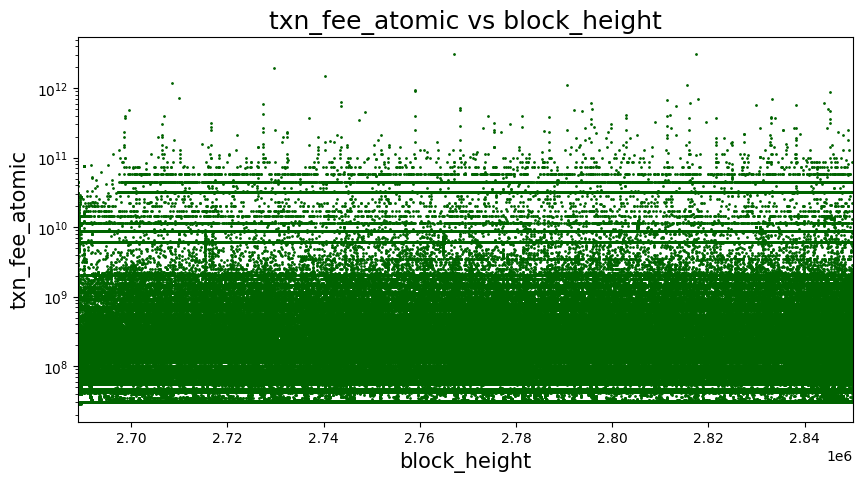

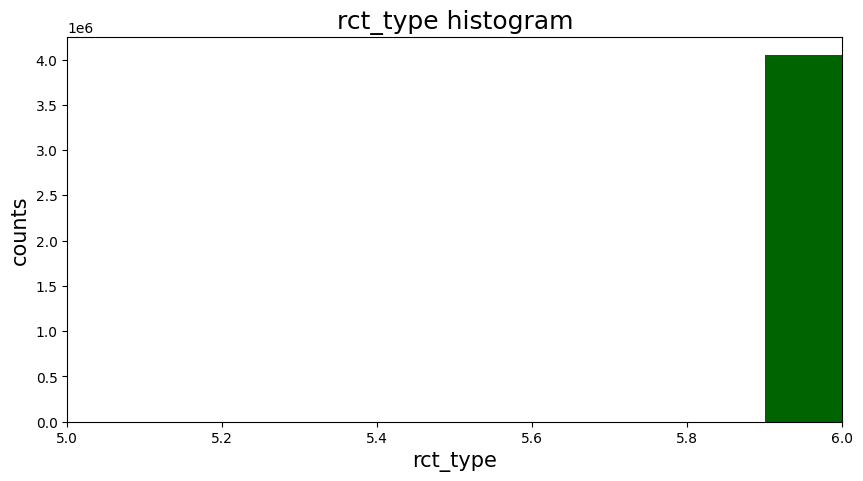

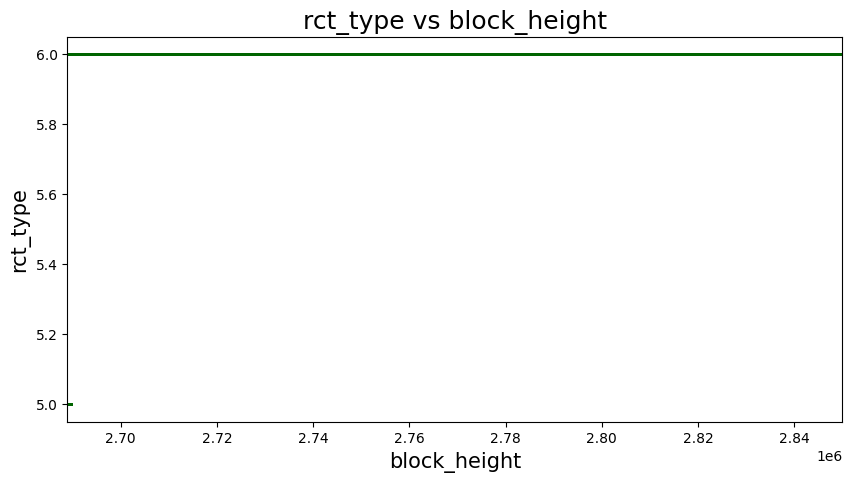

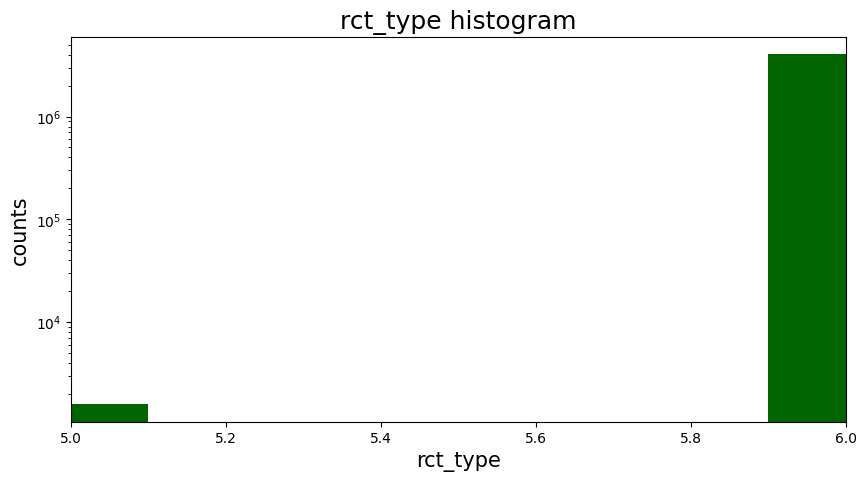

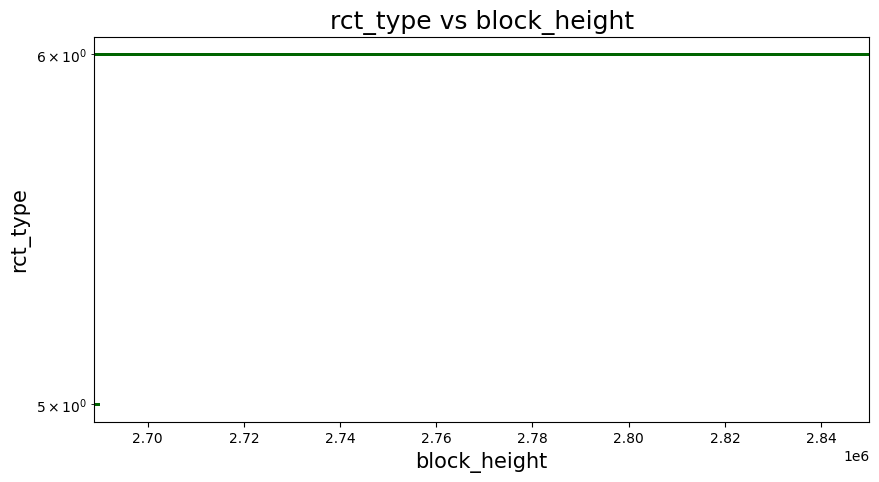

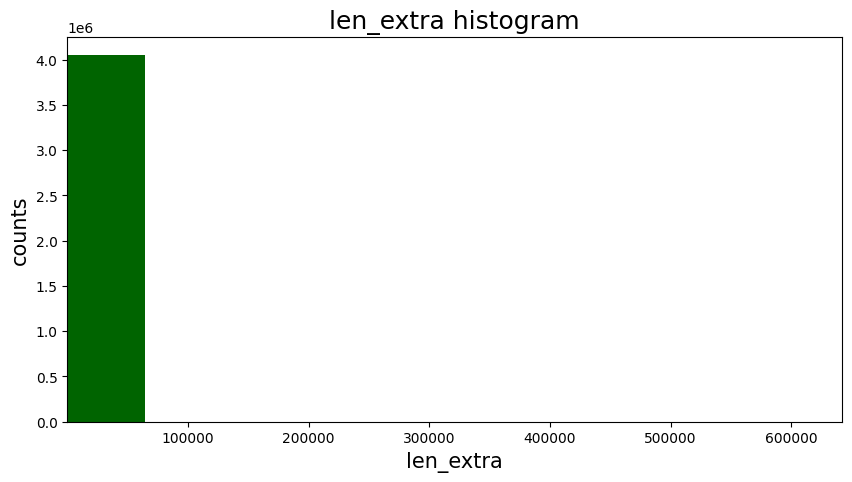

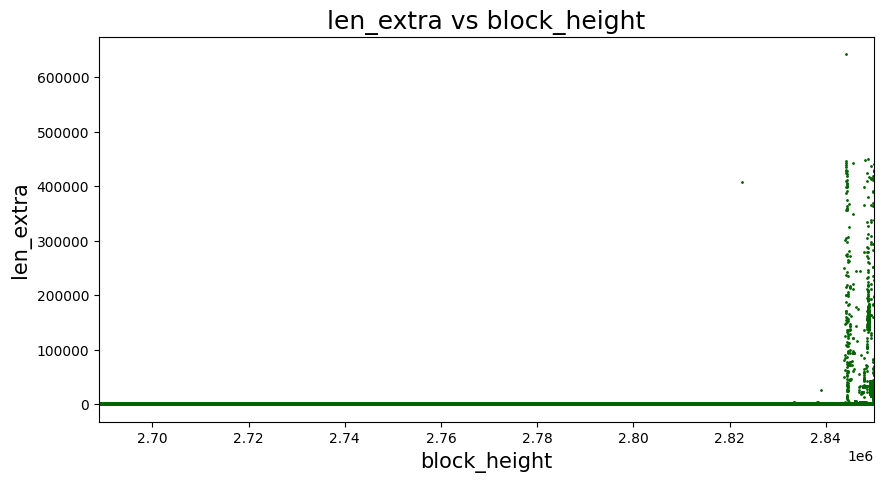

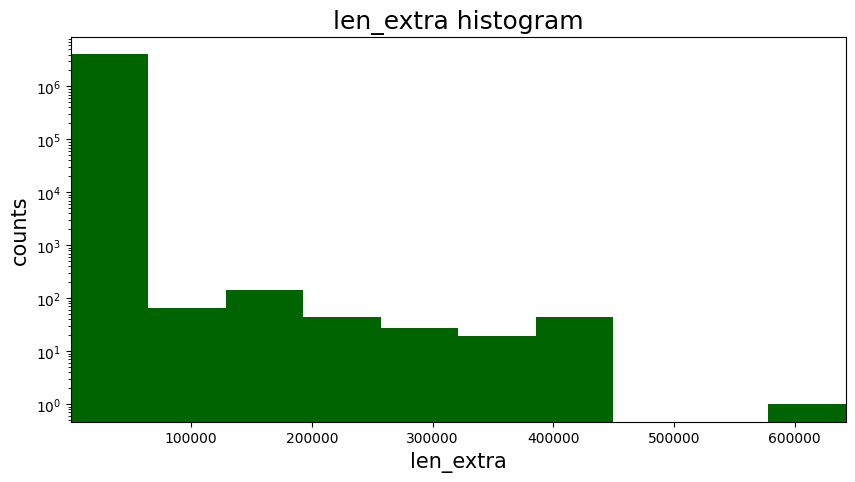

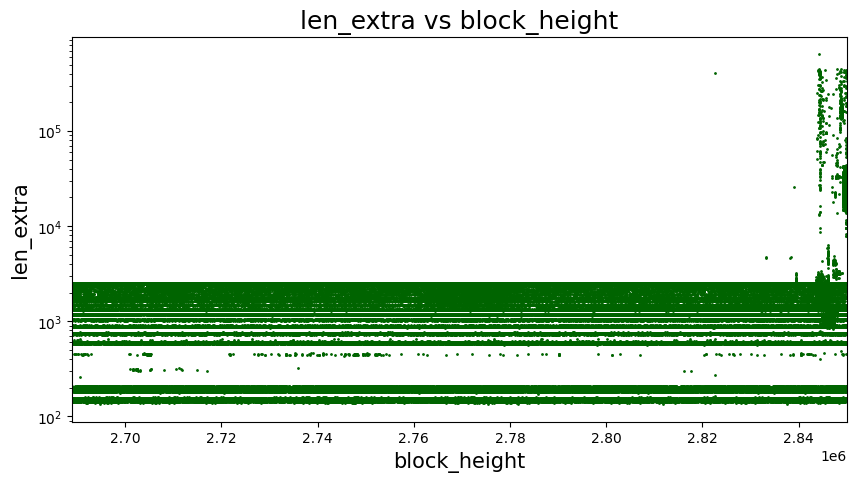

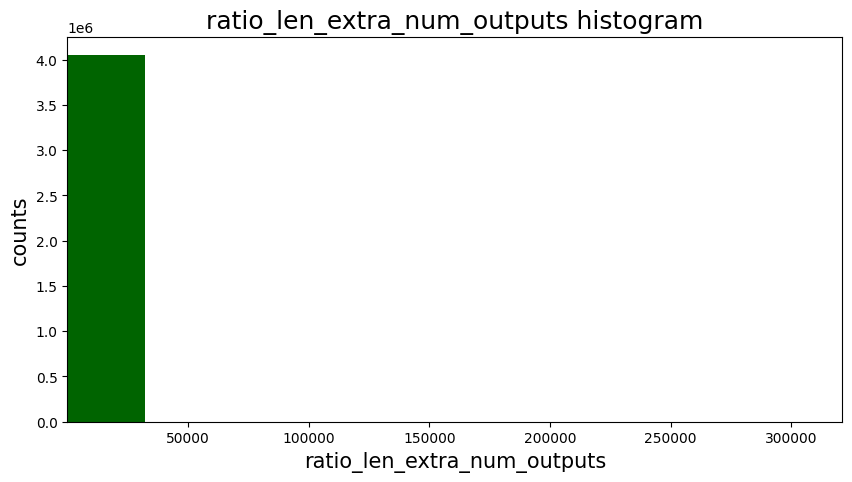

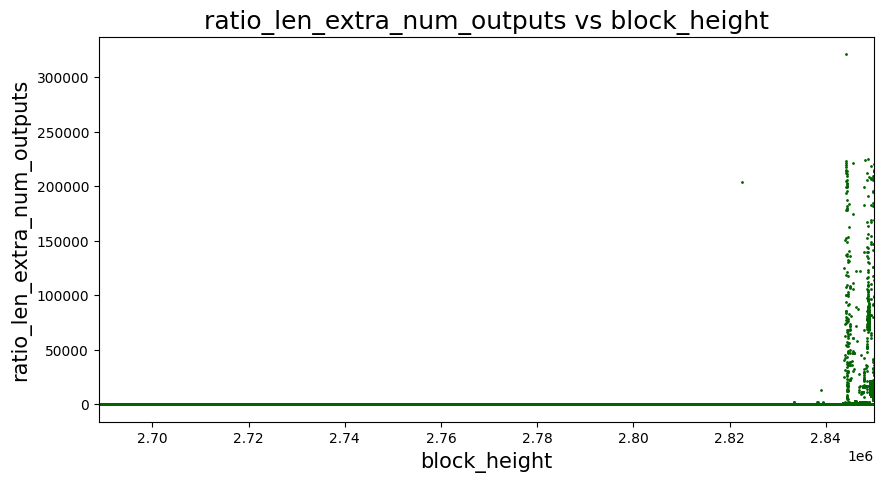

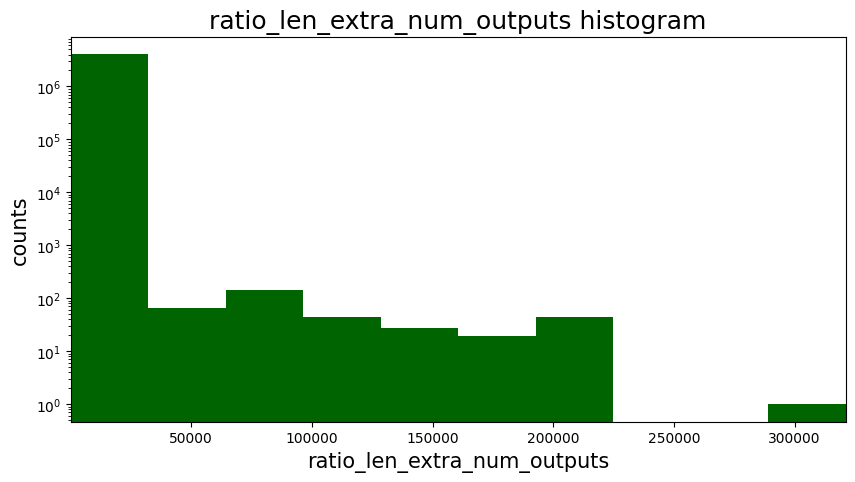

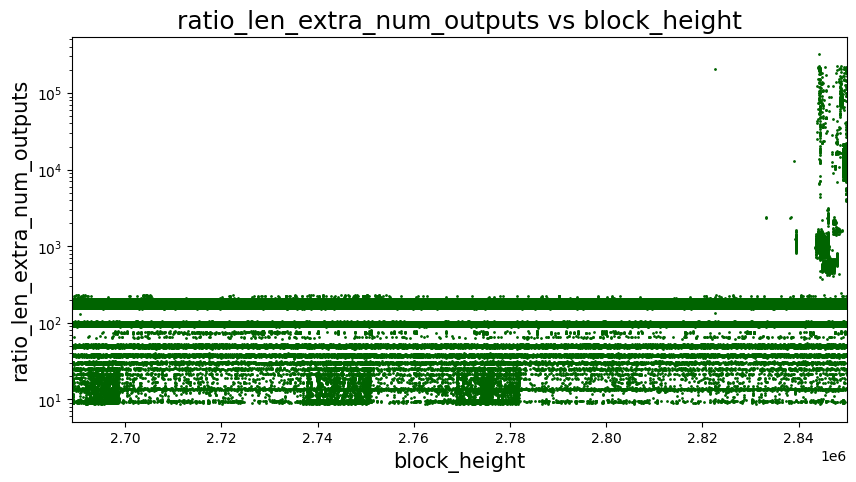

In [6]:
for field_name, log_axes in itertools.product(keys, ['', 'y']):
    plot_kwargs: Dict[str, Any] = {
        'show': True,
        'figsize': (10, 5),
        'log_axes': log_axes,
    }
    v.hist(
        field_name,
        title=f"{field_name} histogram",
        **plot_kwargs
    )
    v.scatter(
        x='block_height',
        y=field_name,
        title=f"{field_name} vs block_height",
        markersize=1,
        **plot_kwargs
    )

## Unlock time stuff

In [7]:
# Count the number of transactions with unlock time < 200
sub_theta: float = len(v.data[v.data['unlock_time'] <= 200])
sub_theta_nonzero: float = len(v.data[(v.data['unlock_time'] <= 200) & (v.data['unlock_time'] > 0)])
print(f"Number of txns with unlock time <= 200: {sub_theta} ({sub_theta / len(v.data) * 100:.4f}%)")
print(f"Num of txns with 0 < unlock time <= 200 : {sub_theta_nonzero} ({sub_theta_nonzero / len(v.data) * 100:.4f}%)")

Number of txns with unlock time <= 200: 4050822 (99.9956%)
Num of txns with 0 < unlock time <= 200 : 1557 (0.0384%)


## Zero fees

In [8]:
zero_fees: float = len(v.data[v.data['txn_fee_atomic'] == 0])
print(f"Number of txns with zero fees: {zero_fees} ({zero_fees / len(v.data) * 100:.4f}%)")

Number of txns with zero fees: 0 (0.0000%)


## Nonzero mode

In [9]:
to_analyze_nonzero: List[str] = [
    'version',
    'unlock_time',
    'num_inputs',
    'num_outputs',
    'txn_fee_atomic',
    'rct_type',
    'len_extra',
    'ratio_len_extra_num_outputs',
]

In [10]:
# For each field in to_analyze_nonzero, eliminate zero values, and then count the most repeated values.
for f in to_analyze_nonzero:
    ...